# Dataset Information 

The Data set contains 3 classes of 50 instance each, where each class refere to a type of iris plants. One class is Linearly separable from the other 2; the latter are NOT linearly separable from each other

Attribute Information:
    
    1. sepal length in cm
    2. sepal width in cm
    3. petal lenght in cm
    4. petal width in cm
    5. class: --Iris Setosa -- Iris Versicolour -- Iris Virginica

## Import Modules

In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# to displat stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# to basic info about datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# to display no. of samples on each class
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Pre Processing the dataset

In [6]:
# Check for null values 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Exploratory data analysis

<Axes: >

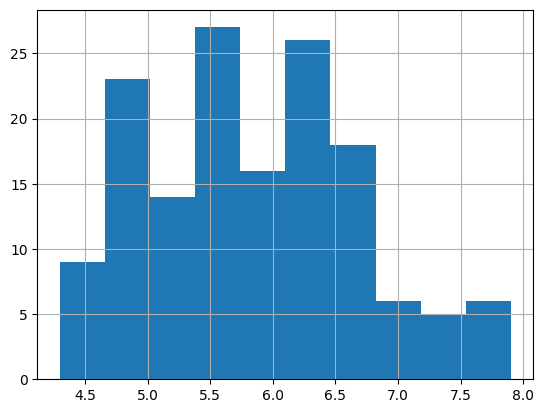

In [7]:
# Histogram 
df['sepal_length'].hist()

<Axes: >

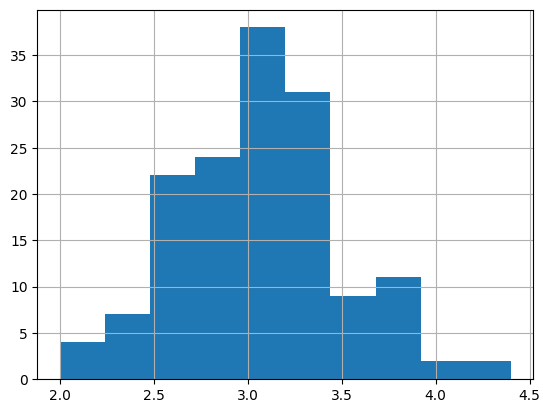

In [8]:
df['sepal_width'].hist()

<Axes: >

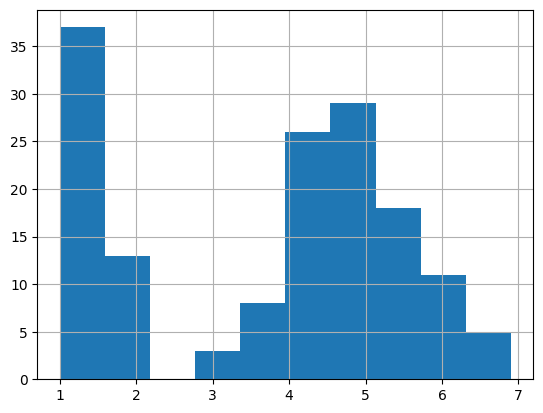

In [9]:
df['petal_length'].hist()

<Axes: >

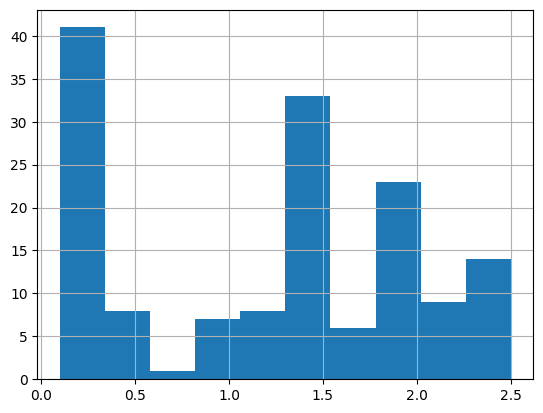

In [10]:
df['petal_width'].hist()

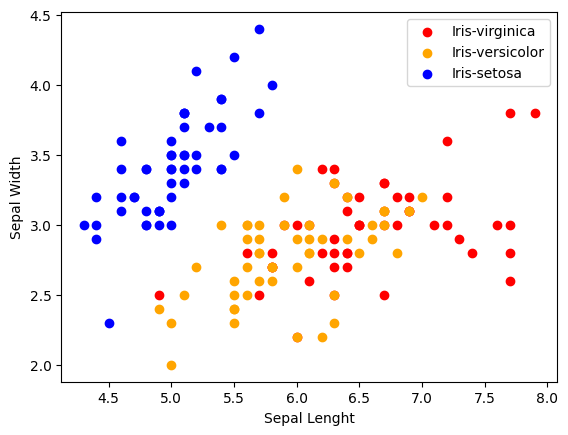

In [11]:
# Scatter plot
colors = ['red','orange','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = species[i])
    plt.xlabel('Sepal Lenght')
    plt.ylabel('Sepal Width')
    plt.legend()
    

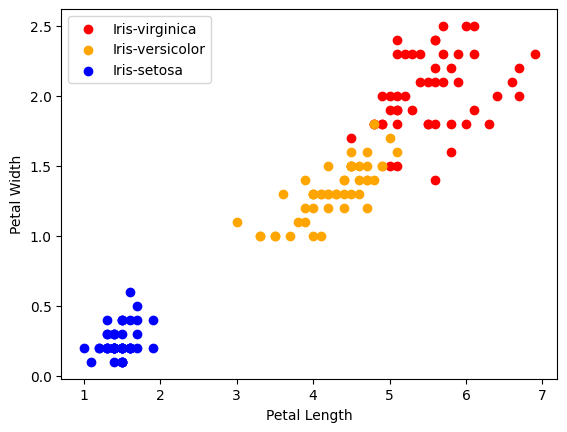

In [12]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

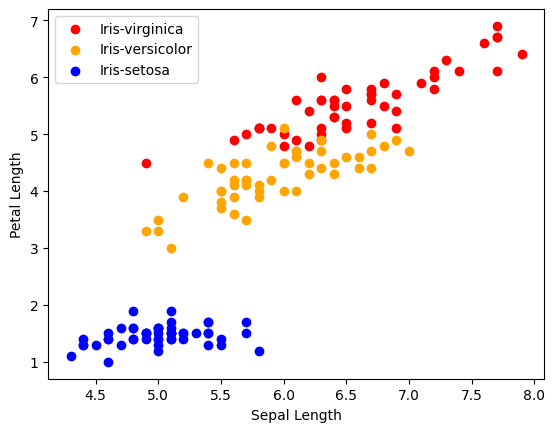

In [13]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

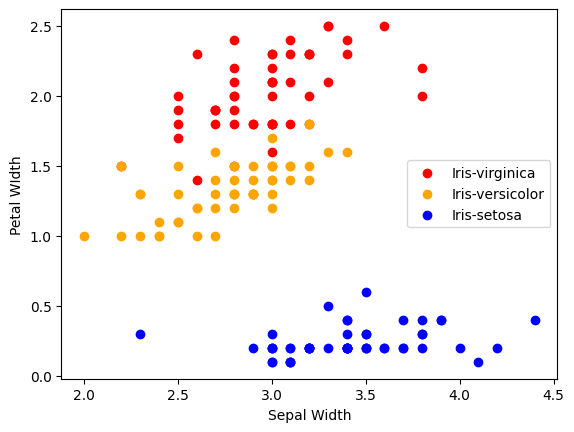

In [14]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal WIdth")
plt.legend()

## Coorelation Matrix

A  correlation matrix is table showing the correlation coefficients between variables. Each cell in the tables shows the correlation between teo variables. The values is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two. 

In [15]:
numerical_df = df.select_dtypes(include=['float64'])
corr = numerical_df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

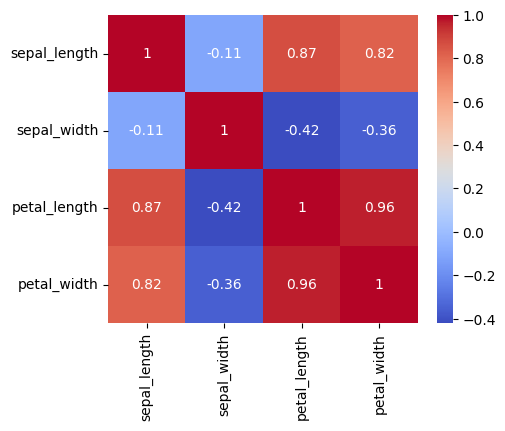

In [16]:
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

## Label Encoder

In machine learning, we usually deal with the dataset which contains the multioe labels in one or more than one columns. These labels can be in the form of words or number. Label encoding refers to converting the labels into the numeric form so as to convert it into the machine readabl form.

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

In [19]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns = ['species'])
Y = df['species']
x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30)

In [20]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
# Modle training
model.fit(x_train, y_train)

LogisticRegression()

In [22]:
print("Accuracy: " , model.score(x_test,y_test) * 100 )

Accuracy:  97.77777777777777


In [23]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [24]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
# Print metric to get performance
print("Accuracy: ", model.score(x_test,y_test) * 100)

Accuracy:  91.11111111111111


In [26]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [27]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
# print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


## Save the model 

In [29]:
# import pickle
# filename = 'savemodel.sav'
# pickle.dump(model,open(filename, 'wb'))
# with open('label_encoder.pkl', 'wb') as encoder_file:
#     pickle.dump(le, encoder_file)

In [30]:
import pickle

with open('savemodel.sav', 'rb') as model_file:
    model = pickle.load(model_file)
with open('label_encoder.pkl', 'rb') as encoder_file:
    label_encoder = pickle.load(encoder_file)

In [34]:
sepal_length = 5.1
sepal_width = 3.5
petal_length = 1.4
petal_width = 0.2

# Predict using the model
features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
encoded_result = model.predict(features)[0]

# Decode the prediction
result = label_encoder.inverse_transform([encoded_result])[0]
print(f"Predicted species: {result}")

Predicted species: Iris-setosa
